## Settings

In [1]:
reviews_path = 'C:\\Data\\UCL\\@MSc Project - Data and sources\\reviews.csv'

In [13]:
from os.path import join
from datetime import datetime
from IPython.core.display import HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
# center plots
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical_align: middle;
}
</style>
""")

## Load the data

In [3]:
reviews = pd.read_csv(reviews_path)

min_date = datetime.strptime('2018-7-1', '%Y-%m-%d')
max_date = datetime.strptime('2020-6-30', '%Y-%m-%d')
reviews['Date'] = pd.to_datetime(reviews.Date)

reviews = reviews[(reviews.Date >= min_date) & (reviews.Date <= max_date)]

In [5]:
reviews.columns

Index(['id', 'Company_id', 'ReviewTitle', 'Rating', 'JobTitle',
       'EmployeeRelationship', 'Contract', 'Pros', 'Cons', 'Year', 'Month',
       'Day', 'Company', 'Sector', 'ListedOn', 'Review', 'ReviewLentgth',
       'Date', 'Year-Month'],
      dtype='object')

## ==Functions==

In [4]:
# helper quantile/quartile functions

def Q1(x):
    return x.quantile(.25)

def Q3(x):
    return x.quantile(.75)

def q5(x):
    return x.quantile(.05)

def q10(x):
    return x.quantile(.1)

def q90(x):
    return x.quantile(.9)

def q95(x):
    return x.quantile(.95)

In [19]:
def dispersion(reviews, group_by, agg_list):
    return (
        reviews
        .groupby(group_by)
        .Rating
        .agg(agg_list)
        .round(3)
        .reset_index()
    )

# 1. Sentiment over time 
 <hr>
across whole company world

In [20]:
over_time = dispersion(reviews, 'Year-Month', ['count', 'mean', 'std'])

In [31]:
over_time

,Year-Month,count,mean,std
0,2018-07-01,16467,3.552,1.230
1,2018-08-01,18629,3.600,1.234
2,2018-09-01,16154,3.582,1.229
3,2018-10-01,16061,3.592,1.218
4,2018-11-01,13935,3.526,1.236
5,2018-12-01,11574,3.524,1.258
6,2019-01-01,16529,3.547,1.236
7,2019-02-01,15492,3.522,1.238
8,2019-03-01,17480,3.536,1.234
9,2019-04-01,16819,3.582,1.224


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

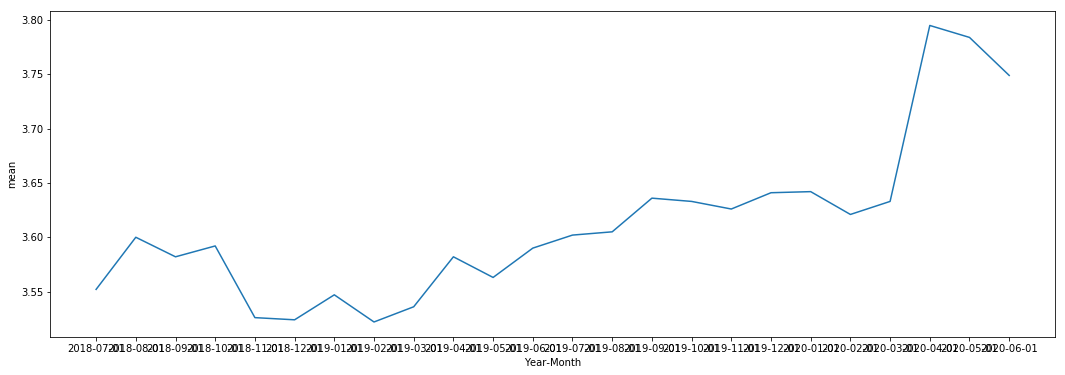

In [30]:
plt.figure(figsize=(18,6))

sns.lineplot(
    x='Year-Month',
    y='mean',
    data = over_time,
)

plt.tight_layout

In [11]:
over-time

NameError: name 'over' is not defined